In [41]:
# !jupyter nbextension enable --py gmaps

In [42]:
import coffee
import gmaps
import googlemaps
import pickle
import logging
import datetime
import json
import os
import pygsheets
import pandas as pd
from pathlib import Path
import matplotlib as mpl


In [43]:
keyfile = open('keys.json', 'r')
api_keys = json.load(keyfile)
google_maps_api_key = api_keys['google_map']

gmaps.configure(api_key=google_maps_api_key)


In [44]:
# configure google docs access
# scope = ['https://spreadsheets.google.com/feeds']
client = pygsheets.authorize(service_file='./hero.json')
coffee_doc_id = '1-JCMcy_NHR8CGw9eDCllpZ1gnbSzinH4riPSWqxC_mw'
coffee_doc = client.open_by_key(coffee_doc_id)

roasts = coffee.util.read_tab_as_df(coffee_doc, 'Roasting Method', col_types={'Batch': int}, index_col=['Batch'], date_cols=['Roasted on'], num_columns=16)
roasts


,Coffee bean,SKU,Roasted on,Quantity (grams),Temperature,Quantity Out,Quantity Out Percentage,Program,Duration (time over program),Cooldown Program,Temp A @ Cooldown (F),Temp B @ Cooldown (F),Color,Roasting notes,Tasting notes
Batch,,,,,,,,,,,,,,,
1,Ethiopia Agaro Kedamai Cooperative,GCX-5770-005,2018-12-09,114.1,67F,96.5,84.57%,P2,42.0,Manual P2; Fast Drum,NaN,NaN,Pale,Much chaff in the cracks,NaN
2,Ethiopia Agaro Kedamai Cooperative,GCX-5770-005,2018-12-15,114.2,67F,96.7,84.68%,P2,27.0,Manual P2; Fast Drum,NaN,NaN,Pale,Much chaff in the cracks,NaN
3,Ethiopia Agaro Kedamai Cooperative,GCX-5770-005,2018-12-23,114.2,67F,97.4,85.29%,P2,59.0,"Manual P1, Slow Drum",NaN,NaN,Light Chocolate,Some chaff in the cracks,"Light flavor less grassy, more full back taste"
4,Ethiopia Agaro Kedamai Cooperative,GCX-5770-005,2018-12-24,228.5,67F,193.7,84.77%,P2,83.0,"Manual P1, Slow Drum",NaN,NaN,Light Chocolate,Some chaff in the cracks,NaN
5,Sweet Maria's Altiplano Blend,FirstOrder-1,2018-12-01,114.1,67F,97.5,85.45%,P2,27.0,"Manual P2, Fast Drum",NaN,NaN,NaN,NaN,NaN
6,Sweet Maria's Altiplano Blend,FirstOrder-1,2018-12-04,114.0,67F,95.6,83.86%,P2,29.0,Auto,NaN,NaN,NaN,NaN,A bit burned
7,Sweet Maria's Altiplano Blend,FirstOrder-1,2018-12-08,251.9,67F,216.4,85.91%,P2,57.0,"Manual P2, Fast Drum",NaN,NaN,NaN,NaN,NaN
8,Ethiopia Debub Merab SWP Decaf,GCX-5734,2018-11-22,114.1,67F,98.3,86.15%,P2,-1.0,"Manual P2, Fast Drum",NaN,NaN,NaN,NaN,Sweet but a little hollow
9,Ethiopia Debub Merab SWP Decaf,GCX-5734,2018-11-23,115.1,67F,100.0,86.88%,P2,5.0,"Manual P1, Fast Drum",NaN,NaN,NaN,NaN,NaN


In [45]:
outws = coffee.util.read_tab_as_df(coffee_doc, 'geo results')
outws

bought_coffees = outws[['source', 'latitude', 'longitude', 'elevation_m']]
roasted_coffee = roasts[['Coffee bean', 'Roasted on', 'Quantity (grams)']]
roasted_coffee = roasted_coffee.groupby('Coffee bean').sum()
combined = pd.merge(roasted_coffee, bought_coffees, left_on='Coffee bean', right_on='source')

In [46]:
fig = gmaps.figure(map_type='TERRAIN')
fig.add_layer(gmaps.heatmap_layer(combined[['latitude', 'longitude']], weights=combined['Quantity (grams)']))
# fig.add_layer()
fig

Figure(layout=FigureLayout(height='420px'))

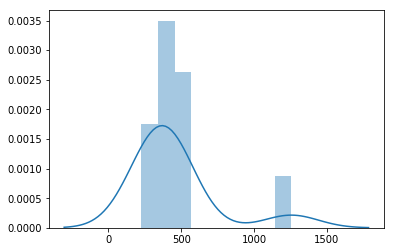

In [51]:
%matplotlib inline
import seaborn as sns
g = sns.distplot(roasted_coffee['Quantity (grams)'].values)
